<a href="https://colab.research.google.com/github/Jaywestty/AB-Testing-Method/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A/B TESTING**

In A/B testing, two or more versions of the same digital asset are shown to different segments of the audience to see which performs the best.
An A/B test compares a control version (A) against a variation (B). Traffic is randomly split with half of the audience viewing version A and the other half viewing version B.
Data-driven insights uncover what your audience likes and responds to most, eliminating guesswork.
Key performance metrics, such as conversion rate, are used to determine which version is most successful.

**In this notebook I would be analysing a Market Campaign Dataset to gain insights and perform statistical testing to understand A/B Testing properly.**

#### **IMPORT REQUIRED LIBRARIES**

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency, shapiro, levene, ttest_ind, mannwhitneyu
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)




#### **DATA UNDERSTANDING**

In [2]:
#load dataset saved on github for easy access
df = pd.read_csv('https://raw.githubusercontent.com/Jaywestty/AB-Testing-Method/refs/heads/main/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
#Check Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


**Information About Dataset Columns**:
- **user id**: User ID (unique)
- **test group**: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- **converted**: If a person bought the product then True, else is False
- **total ads**: Amount of ads seen by person
- **most ads day**: Day that the person saw the biggest amount of ads
- **most ads hour**: Hour of day that the person saw the biggest amount of ads

In [4]:
#Check shape of Data
shape = list(df.shape)
print(f"The Dataset has {shape[0]} rows and {shape[1]} columns.")

The Dataset has 588101 rows and 7 columns.


In [5]:
#Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#descriptive statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


In [7]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

#### **EXPLANATORY DATA ANALYSIS (EDA)**

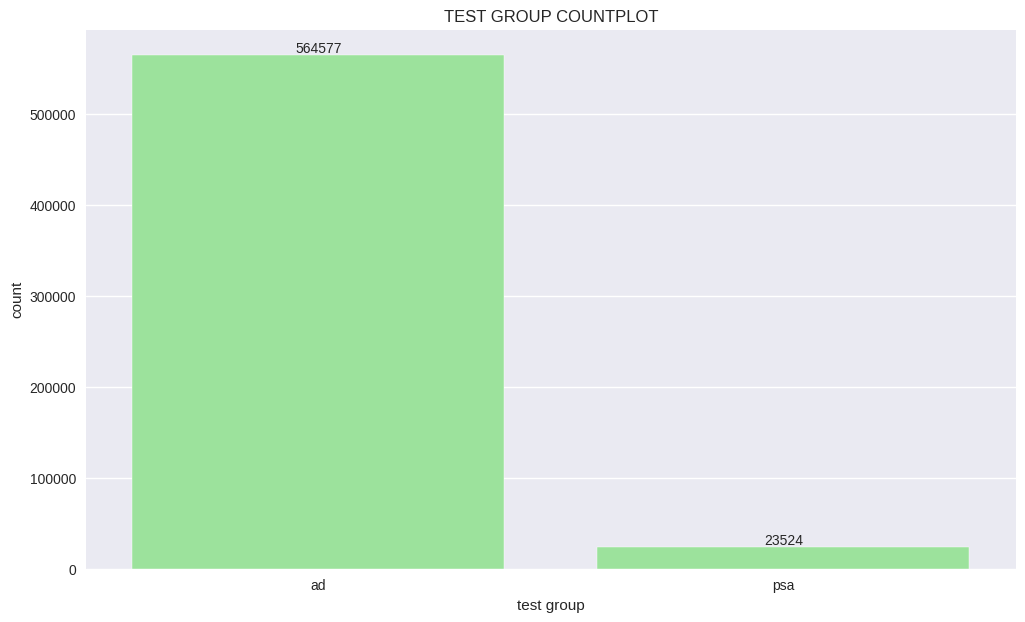

In [8]:
#Visualize test group
plot = sns.countplot(data=df, x=df['test group'], color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('TEST GROUP COUNTPLOT')
plt.show()

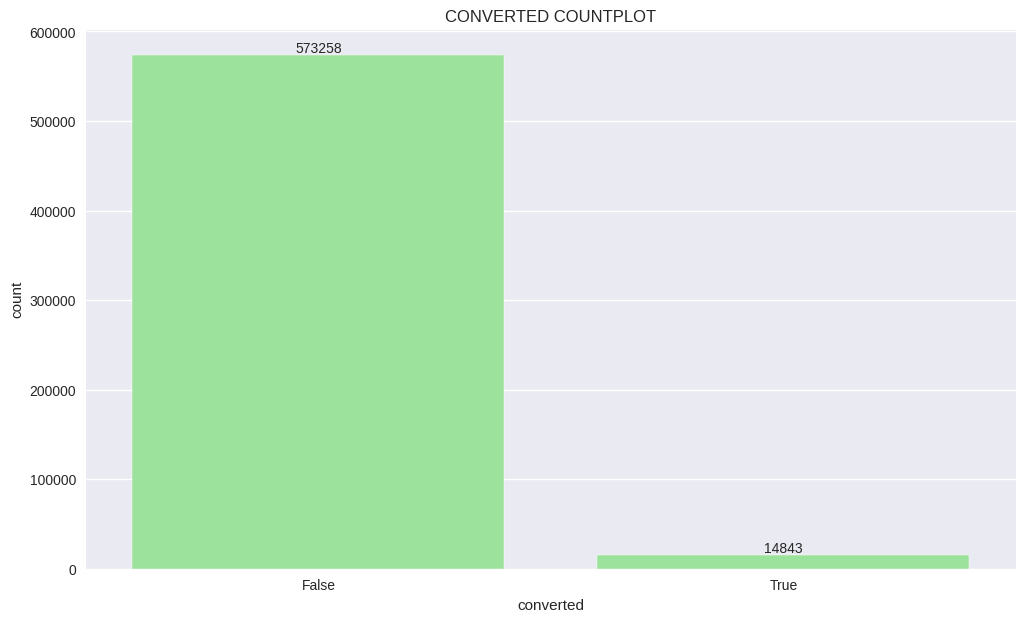

In [9]:
#Visualize Converted
plot = sns.countplot(data=df, x=df['converted'], color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('CONVERTED COUNTPLOT')
plt.show()

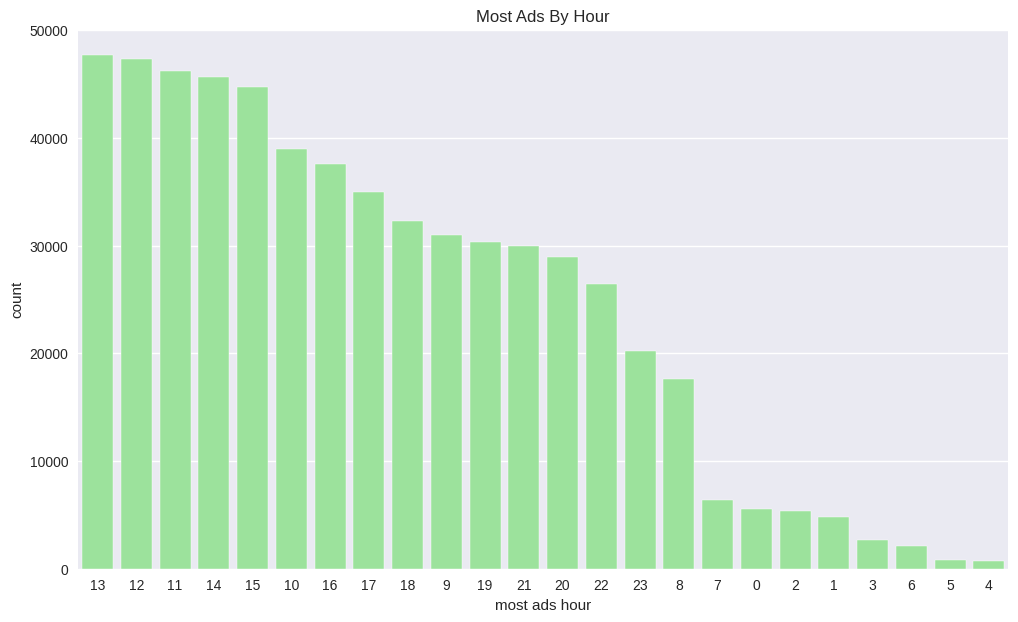

In [10]:
#Visualize the most ads hour column
sns.countplot(data=df, x='most ads hour', order=df['most ads hour'].value_counts().index, color='lightgreen')
plt.title('Most Ads By Hour')
plt.show()

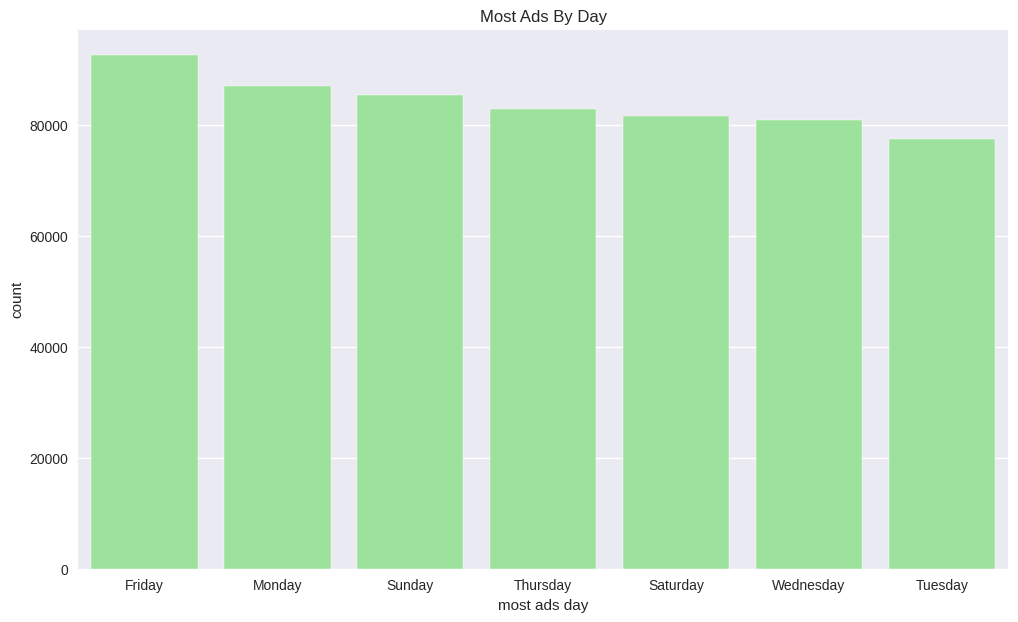

In [11]:
#Visualize the most ads hour column
sns.countplot(data=df, x='most ads day', order=df['most ads day'].value_counts().index, color='lightgreen')
plt.title('Most Ads By Day')
plt.show()

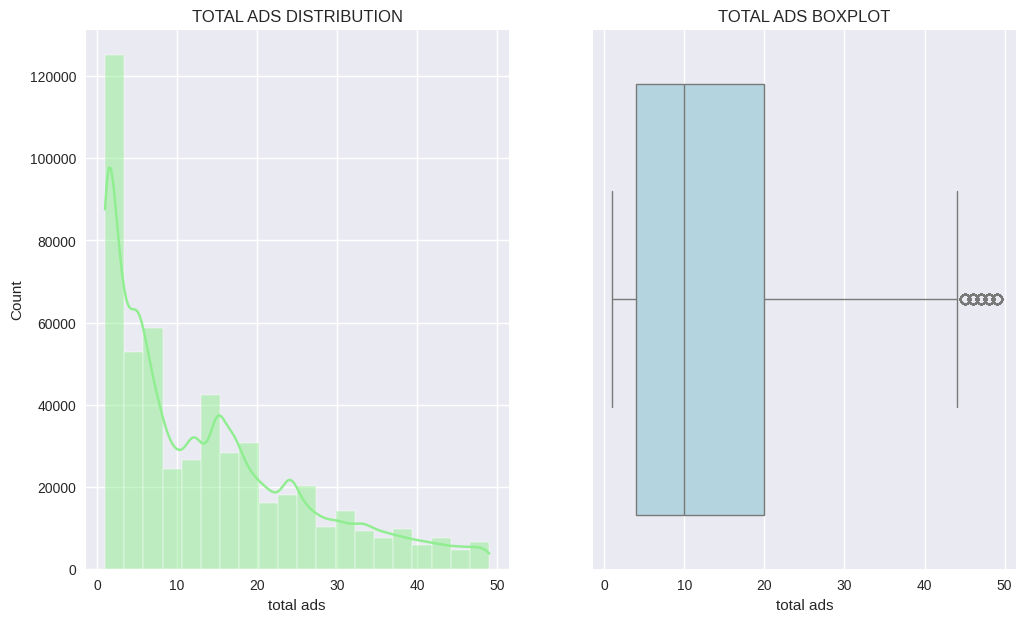

In [12]:
#Visualize test group using histogram
plt.subplot(1,2,1)
sns.histplot(df[df['total ads']<50],x='total ads', kde=True, bins=20, color='lightgreen') #filter the data for a value close to the 75th percentile just for better visualizations.
plt.title('TOTAL ADS DISTRIBUTION')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df[df['total ads']<50], x='total ads', color='lightblue') #filter the data for a value close to the 75th percentile just for better visualizations.
plt.title('TOTAL ADS BOXPLOT')

plt.show()

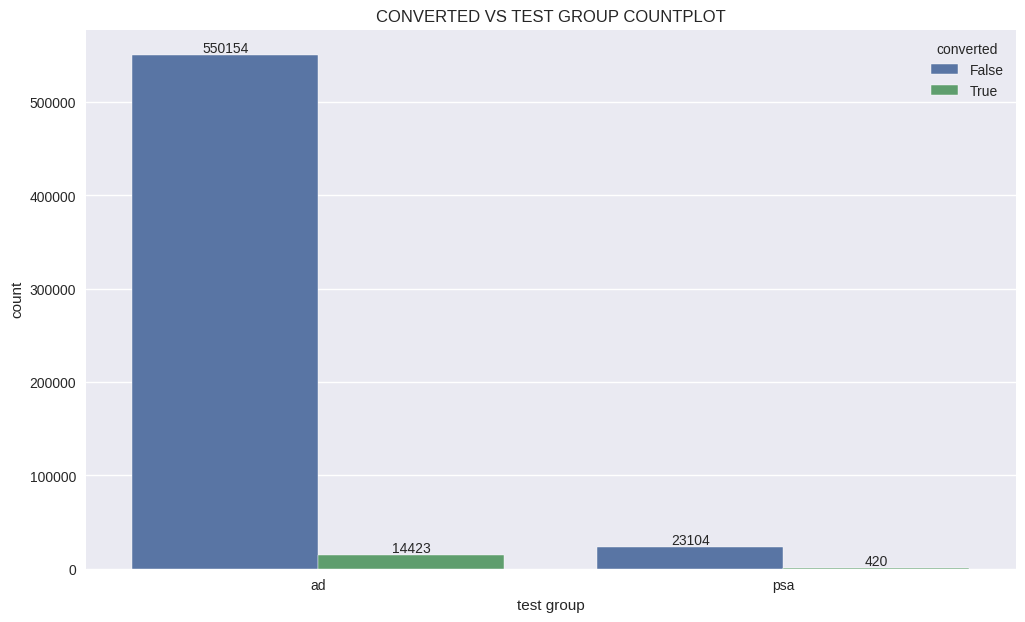

In [13]:
 #Visualize the converted by test group
plot = sns.countplot(data=df, x=df['test group'],hue=df['converted'])
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('CONVERTED VS TEST GROUP COUNTPLOT')
plt.show()

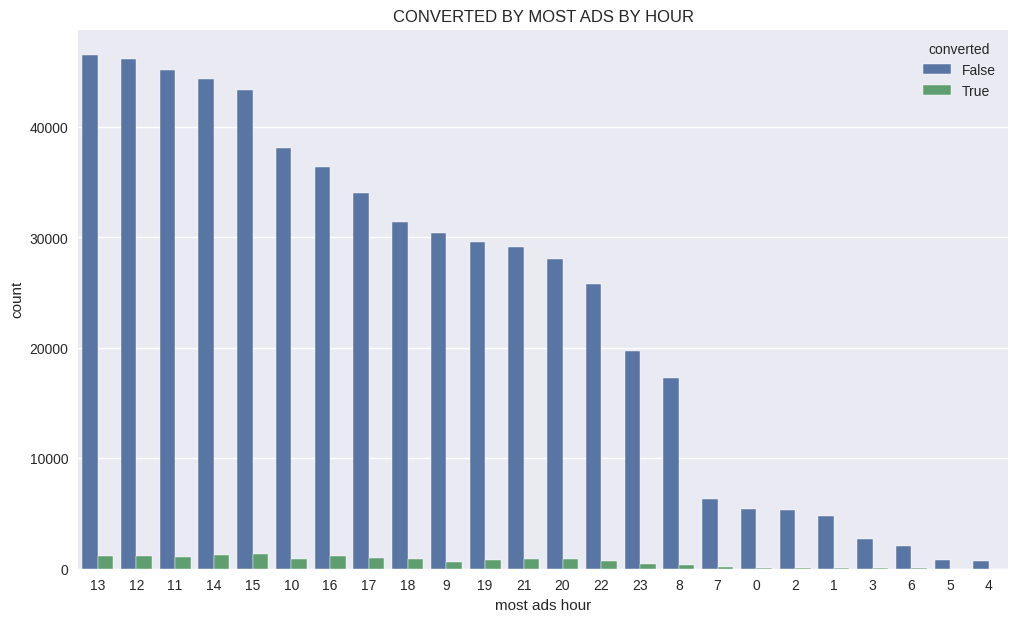

In [14]:
#Visualize Converted by most ads hour column
sns.countplot(data=df, x='most ads hour', order=df['most ads hour'].value_counts().index,hue=df['converted'])
plt.title('CONVERTED BY MOST ADS BY HOUR')
plt.show()

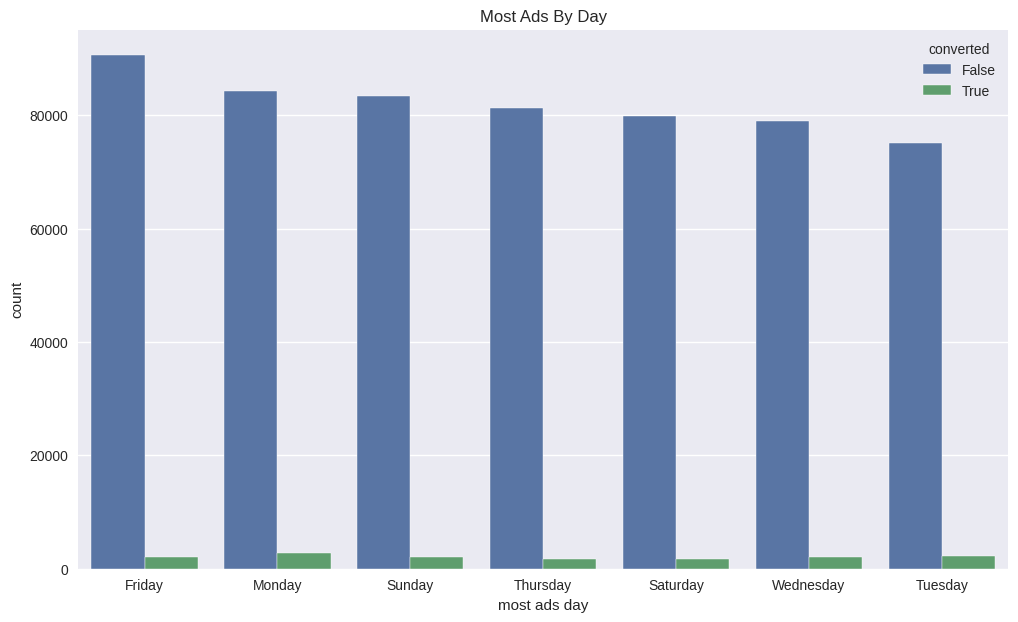

In [15]:
#Visualize the most ads hour column
sns.countplot(data=df, x='most ads day', order=df['most ads day'].value_counts().index,hue=df['converted'])
plt.title('Most Ads By Day')
plt.show()

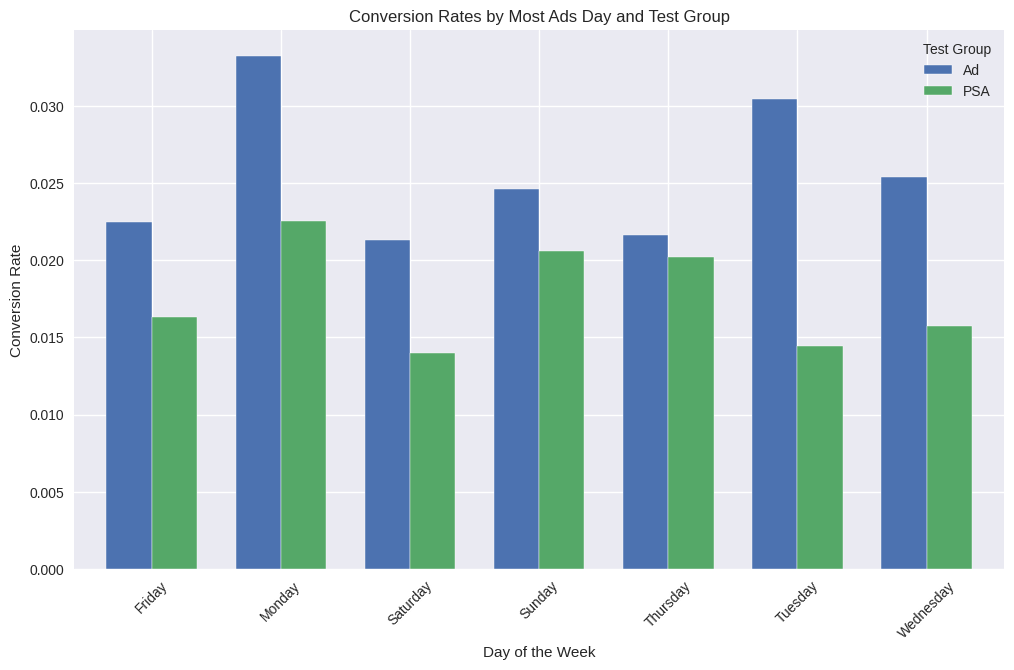

In [20]:
#A bar plot comparing conversion rates across the different days of the week, segmented by test group.
conversion_rate_by_day = df.groupby(['most ads day', 'test group'])['converted'].mean().unstack()

conversion_rate_by_day.plot(kind='bar', stacked=False, width=0.7)
plt.title('Conversion Rates by Most Ads Day and Test Group')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Test Group', labels=['Ad', 'PSA'])
plt.show()

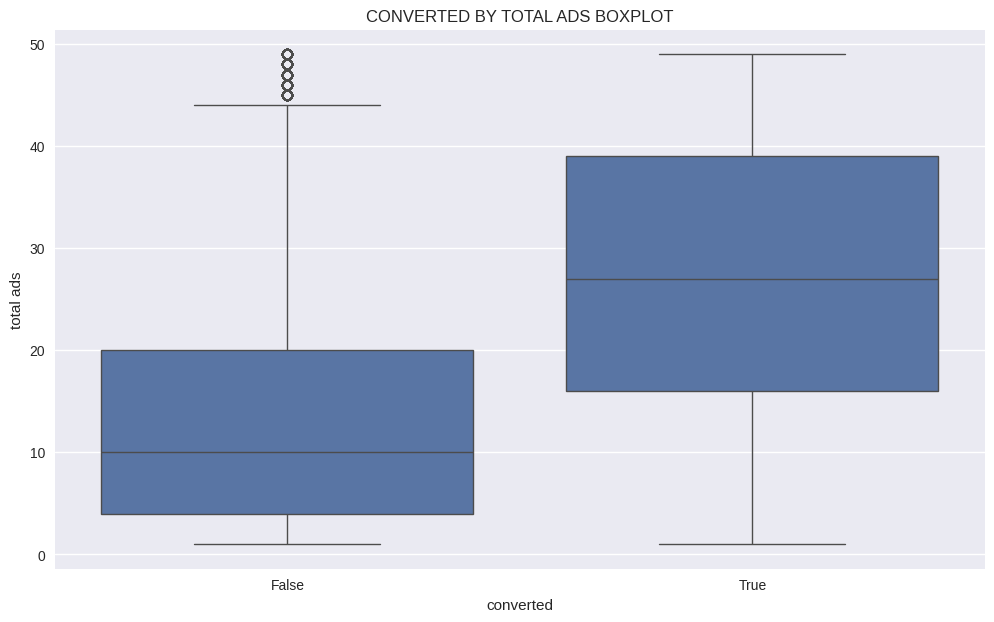

In [16]:
#Boxplot
sns.boxplot(data=df[df['total ads']<50], y='total ads',x='converted') #filter the data for a value close to the 75th percentile just for better visualizations.
plt.title('CONVERTED BY TOTAL ADS BOXPLOT')

plt.show()

### **STATISTICAL TESTS**

#### **CHI-SQUARED TEST**

Chi-Square tests of independence (categorical tables) are used when comparing categorical distributions.

In [17]:
#set alpha
alpha = 0.05

#define variable
df_cat = df[['test group', 'most ads day', 'most ads hour']]
for variable in df_cat:
  #create contigency tablee
  contigency_table = pd.crosstab(df_cat[variable], df['converted'])

  #perform chi squared test
  chi2, p, dof, expected = chi2_contingency(contigency_table)

  #display results
  print(f'\nChi-Squared test for {variable} vs converted')
  print(f'Chi-Squared value: {chi2}')
  print(f'p-value: {p}')

  #check for significance
  if p < alpha :
    print(f'The difference in conversion rates across {variable} is statistically significant')
  else:
    print(f'There is no significant difference in conversion rates across {variable}')



Chi-Squared test for test group vs converted
Chi-Squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant

Chi-Squared test for most ads day vs converted
Chi-Squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant

Chi-Squared test for most ads hour vs converted
Chi-Squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant


Explanation of the results:
if p-value < alpha ---> reject the null hypothesis(the null hypothesis is the established fact) which means A and B are statistically different, alpha was set to 0.05, and from our results we p-values way lesser than the alpha, hence we reject the null hypothesis which we then say the difference in conversion rates across the test group, most ads day and most ads hour is statiscally significant.

#### **SHAPIRO WILK TEST**

The shapiro-wilk is used to test if your data is normally distributed, it is used before running parametric tests such as T-Test, Anova because those tests assume normality

In [21]:
#Normality check
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204


Explanation of Shapiro test result; Both test group are lesser than 0.05 which is the standard alpha value,which proves the two groups are not normally distributed.

#### **LEVENE TEST**

The levene test checks equality of variances between two or more groups, it is also used before t-test or ANOVA because these tests assume equal variances (homoscedasticity).

In [22]:
#Equality of varaiance assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's Test for equality of variances: p-value = {levene_p_value}")

Levene's Test for equality of variances: p-value = 0.0


Explanation of Levene test result; the p-value is lesser than 0.05 too which proves variances are not equal.

#### **MANN-WHITNEY U TEST**

From the results gotten from the normality and equality of variance test, the Mann-Whitney U test is the best since it handles non-parametric tests.

In [24]:
#Perform the suitable test
alpha = 0.05
#use Mann-Whitney U test
u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0
